In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 


In [2]:

#data loading
df = pd.read_csv('data/carData.csv')
year = df['Year'].values.reshape(-1,1)
selling_price = df['Selling_Price'].values * 1000


In [3]:

#split dataset on 80% data for train and 20% data for test 
X_train, X_test, y_train, y_test = train_test_split(year, selling_price, test_size=0.2, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



(240, 1)
(240,)
(61, 1)
(61,)


In [4]:
#model creation
model = LinearRegression()

model.fit(X_train,y_train)

score = model.score(X_test,y_test)
print('score '+str(score))

prediction = model.predict(X_test)
print(f' prediction {prediction} ' )



score 0.08622772011289559
 prediction [5028.87322366 3609.45957624 5028.87322366 5383.72663551 5738.58004737
 5383.72663551 3964.31298809 5383.72663551 4319.16639995 3964.31298809
 3609.45957624 5383.72663551 5738.58004737 5028.87322366 5383.72663551
 5738.58004737 5383.72663551 4674.0198118  3609.45957624 5738.58004737
 3609.45957624 5383.72663551 4319.16639995 5383.72663551 2544.89934067
 5738.58004737 3609.45957624 4674.0198118  3964.31298809 2899.75275253
 3254.60616438 4674.0198118  4674.0198118  5383.72663551 2899.75275253
 5383.72663551 5383.72663551 5028.87322366 2544.89934067 4674.0198118
 6093.43345922 4674.0198118  5028.87322366 5028.87322366 4674.0198118
 5383.72663551 4319.16639995 5383.72663551 4319.16639995 5028.87322366
 4674.0198118  5383.72663551 4319.16639995 5028.87322366 5383.72663551
 5028.87322366 4319.16639995 3609.45957624 4319.16639995 4674.0198118
 1480.33910511] 


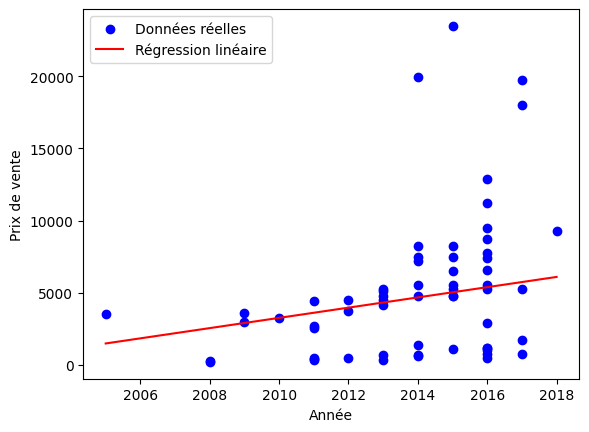

In [5]:
#we sort the datas to have a right line instead of several peaks
sorted_indices = np.argsort(X_test.flatten())  
X_test_sorted = X_test[sorted_indices]
prediction_sorted = prediction[sorted_indices]

#display with my plot lib

plt.scatter(X_test, y_test, label='Données réelles', color='b')  # Points réels
plt.plot(X_test_sorted, prediction_sorted, color='r', label='Régression linéaire')  # Droite de régression
plt.xlabel('Année')
plt.ylabel('Prix de vente')
plt.legend()
plt.show()
